## <center>Resolución del problema del puzzle-8 mediante búsqueda heurística</center>
### Grupo Nro. 5
### **Integrantes:**
* Ponce Miguel
* Castro Luis
* Sanchez Raul

### **Asignatura:**  Razonamiento y Planificación Automática
### **Actividad:** Nro. 2 - mia04_t6grupal

## 1. Implementación puzzle-8 mediante búsqueda heurística

### Librerías utilizadas

In [1]:
import numpy as np
import random

* Se crean las constantes que serán utilizadas para el desarrollo del ejercicio.
* La variable **maxima_profundiad** establece un valor máximo de profundidad para evitar bucles infinitos.
* La variable **imprimir** la cual permite imprimir los resultados durante la ejecución del algoritmo A*.
* La variable **espacio_vacio** identifica el valor vacío en el puzzle.

In [2]:
maxima_profundiad = 10000
imprimir = True
espacio_vacio = 0

### Definición de la clase Nodo
Para el desarrollo del ejercicio se realizará una implementación mediante es uso de clases tipo nodo. Para esto se crea la clase que tiene la siguiente información:

* El atributo **nodo** el cual tiene representa el id del nodo.
* El atributo **puzzle** es una matriz nxn que contiene los números que se representan en el juego.
* El atributo **accion** representa el tipo de movimiento el cual puede tomar los valores: arriba,abajo,izquierda,derecha
* El atributo **ficha** identifica la ficha que fue movida.
* El atributo **nodoPadre** determina el padre de un nodo y este sirve para determinar la ruta hacia el nodo meta.
* El atributo **nodoshijos** son los nodos hijos que se generan en función del nodo padre.

Métodos:
* El método **ordenar_lista_heuristica** permite ordenar los nodos hijos por el número de fichas mal colocadas respecto al estado objetivo. 
* El método **calcular_funcion_evaluacion** representa la función de evaluación f(n)=g(n)+h'(n), donde h'(n) representa el valor heurístico del nodo a evaluar desde el nodo actual(n) contra el final, y g(n) el coste real del camino en  este caso es un valor uniforme.
* El método **calcular_heuristica** determina el número de fichas mal colocadas respecto al estado objetivo.

In [3]:
class Nodo:
    def __init__(self,nodo, puzzle,nodoshijos=None, accion=None,ficha=None,heuristica=None):
        self.nodo = nodo
        self.nodoPadre = None
        self.nodoshijos = nodoshijos        
        fil,col=puzzle.shape
        if fil!=col:
            raise Exception('El puzzle no es una matriz n*n') 
        self.puzzle = puzzle
        self.accion = accion
        self.ficha = ficha
        self.heuristica = heuristica
        self.costo = 0
        
    def __str__(self):
        formato = "\nAccion:{0}-Ficha:{1}-Costo:{2}-Heurisitca:{3} \nPuzzle:\n{4}"
        return formato.format(self.accion,self.ficha,self.costo,
                              self.heuristica,str(self.puzzle))
    def __eq__(self, obj):
        return (self.puzzle==obj.puzzle).all()
    
    def ordenar_lista_heuristica(self, costo, nodometa):
        for i in range(len(self.nodoshijos)):
          for j in range(i+1,len(self.nodoshijos)): 
            nodoA = self.nodoshijos[i]
            nodoB = self.nodoshijos[j]
            heuA = nodoA.calcular_heuristica(nodometa)
            nodoA.heuristica = heuA
            nodoA.costo = costo
            fnA = nodoA.calcular_funcion_evaluacion()
            heuB = nodoB.calcular_heuristica(nodometa)
            nodoB.heuristica = heuB
            nodoB.costo = costo
            fnB = nodoB.calcular_funcion_evaluacion()          
            if(fnB > fnA):
                nodotemp = self.nodoshijos[i]
                self.nodoshijos[i] = self.nodoshijos[j]
                self.nodoshijos[j] = nodotemp
                
    def calcular_funcion_evaluacion(self):
        return self.costo*self.heuristica 
                
    def calcular_heuristica(self,nodometa):
        fil,cols = self.puzzle.shape
        fichas_mal_colocadas = 0 
        for i in range(fil):
            for j in range(cols):
                if(self.puzzle[i,j]!=espacio_vacio):
                    if(self.puzzle[i,j]!=nodometa.puzzle[i,j]):
                        fichas_mal_colocadas = fichas_mal_colocadas+1            
        return fichas_mal_colocadas

### Definición de la clase PuzzleClass
Se crea una clase que representa el juego como tal, esta clase implementa métodos auxiliares para la creación y manejo del puzzle.
* *Nota: El espacio vacío está representado por el número: 0.*

Métodos:
* El método **buscar_espacio_vacio** permite identificar los índices fila y columna del espacio vacío. 
* El método **pos_adyacente** permite identificar todas las posiciones adyacentes al espacio vacío en el tablero.
* El método **crear_puzzle_hijos** permite crear todas las combinaciones nodos hijos con sus respectivos movimientos por cada ficha una vez determinada la posición vacía.
* El método **crear_nodos_hijos** asigna los nodos hijos para cada nodo principal.
* Los métodos **imprimir_resultado_nodo** y **imprimir_meta** permiten imprimir los resultados de la ejecución del algoritmo A*.
* El método **resolver_puzzle** representa la búsqueda A* basada en heurística, este algoritmo utiliza este paradigma y por tanto debe crear los nodos hijos y de igual manera la llamada a la ejecución de la función heurística sobre estos nodos.


In [2]:
class PuzzleClass:        
    def buscar_espacio_vacio(self,arreglo):
      for i in range(arreglo.shape[0]):
        for j in range(arreglo.shape[1]):
          if(arreglo[i,j] == espacio_vacio):
            return np.array([i,j])
        
    def pos_adyacente(self, i, j): 
      i_arriba = i - 1 
      i_abajo = i + 1  
      j_izquierda = j - 1
      j_derecha= j + 1    
      return np.array([[i_arriba,j, "arriba"],
                       [i_abajo,j, "abajo"],
                       [i, j_izquierda, "izquierda"], 
                       [i, j_derecha, "derecha"]])

    def movimiento_espejo(self,accion):
        if "arriba"== accion:
            return "abajo"
        if "abajo"== accion:
            return "arriba"
        if "izquierda"== accion:
            return "derecha"
        if "derecha"== accion:
            return "izquierda"
        
    def crear_puzzle_hijos(self,i,j,pos_ayacentes,puzzle):
        puzzle_hijos= []
        fil,col = puzzle.shape
        acciones= []
        fichas= []
        for i_ady1,j_ady1, accion in pos_ayacentes:     
            i_ady = int(i_ady1)
            j_ady = int(j_ady1)
            puzzle_hijo = puzzle.copy()
            val_vacio = puzzle[i,j]        
            if (0<=i_ady and i_ady<fil) and (0<=j_ady and j_ady<col):
                val_temp = puzzle[i_ady,j_ady]
                puzzle_hijo[i,j] = val_temp
                puzzle_hijo[i_ady,j_ady] = val_vacio
                puzzle_hijos.append(puzzle_hijo)
                acciones.append(self.movimiento_espejo(accion))
                fichas.append(val_temp)
        return puzzle_hijos, acciones, fichas  
    
    def crear_nodos_hijos(self,nodo):
        (i,j) = self.buscar_espacio_vacio(nodo.puzzle)
        pos_ayacentes = self.pos_adyacente(i, j)
        puzzle_hijos,acciones,fichas = self.crear_puzzle_hijos(i,j,pos_ayacentes,nodo.puzzle)
        nodos_hijos=[]
        id_nodo = "A_"+str(random.random())
        con = 0
        for puzzle_hijo in puzzle_hijos:
            id_hijo = id_nodo+str(con)
            nodos_hijos.append(Nodo(id_hijo,puzzle_hijo, accion=acciones[con], ficha = fichas[con]))
            con = con+1
        return nodos_hijos
    
    def imprimir_lista_abiertos(nodosAbiertos):
        if imprimir:
            print("Nodos Abiertos")            
            for nodoAb in nodosAbiertos:
                print(str(nodoAb))
            print("----------------------")
            
    def imprimir_lista_visitados(nodosVisitados):
        if imprimir:
            print("Nodos Visitados")
            for nodoVis in nodosVisitados:
                print(str(nodoVis))
            print("----------------------")
            
    def imprimir_accion(nodo,contador):
        if imprimir:            
            if nodo.accion == "izquierda" or nodo.accion == "derecha": 
                texto="Acción: Paso {0} - mover ficha {1} hacia la {2}."
                print(texto.format(contador,nodo.ficha,nodo.accion))
            else:
                texto="Acción: Paso {0} - mover ficha {1} hacia {2}."
                print(texto.format(contador,nodo.ficha,nodo.accion))
                
    def imprimir_resultado_nodo(nodo,contador):
        if imprimir:            
            print("**NODO RUTA**")
            print("Nodo: ", contador)
            PuzzleClass.imprimir_accion(nodo,contador)
            print(nodo.puzzle)            
            print("----------------------")
            
    def imprimir_meta(nodo,contador):
        if imprimir:
            print('**NODO META**')
            PuzzleClass.imprimir_resultado_nodo(nodo,contador)                                           
         
    def resolver_puzzle(self,nodoInicial,nodoMeta):
        nodosAbiertos=[]
        nodosVisitados=[]    
        nodosAbiertos.append(nodoInicial)  
        contador = 0
        while nodosAbiertos:
            PuzzleClass.imprimir_lista_abiertos(nodosAbiertos)
            PuzzleClass.imprimir_lista_visitados(nodosVisitados)
            nodo=nodosAbiertos.pop(0)                        
            if contador > maxima_profundiad:
                raise Exception('Se ha superado la profundidad máxima')                           
            if nodo==nodoMeta:
                PuzzleClass.imprimir_meta(nodo,contador)
                return nodo,True
            if not nodo in nodosVisitados: 
                nodosVisitados.append(nodo)            
                PuzzleClass.imprimir_resultado_nodo(nodo,contador)
                contador = contador +1
                nodo.nodoshijos=self.crear_nodos_hijos(nodo)    
                nodo.ordenar_lista_heuristica(contador,nodoMeta)        
                for nodohijo in nodo.nodoshijos:
                    if not nodohijo in nodosVisitados:                                                         
                        if not nodohijo.nodoPadre:
                            nodohijo.nodoPadre = nodo                         
                        nodosAbiertos.insert(0,nodohijo)
        return None, False

### Ejecutar la estrategia de búsqueda heurística A*
Con el fin de resolver el problema del puzzle-8. Utiliza como heurística el número de fichas mal colocadas respecto al estado objetivo. Considera que el coste de cada movimiento es 1.
* El estado inicial del puzzle es el siguiente:
<table style="width:12%">
  <tr>
    <th colspan="3">Estado Inicial</th>    
  </tr>
  <tr>
    <td>2</td><td>8</td><td>3</td>
  </tr>
  <tr>
    <td>1</td><td>6</td><td>4</td>
  </tr>
    <tr>
    <td>7</td><td></td><td>5</td>
  </tr>
</table>

* El estado objetivo es el siguiente:
<table style="width:12%">
  <tr>
    <th colspan="3">Estado Objetivo</th>    
  </tr>
  <tr>
    <td>1</td><td>2</td><td>3</td>
  </tr>
  <tr>
    <td>8</td><td> </td><td>4</td>
  </tr>
    <tr>
    <td>7</td><td>6</td><td>5</td>
  </tr>
</table>

Para cada iteración del algoritmo indica claramente el nodo que ha sido expandido, el contenido de la lista abierta y de la lista cerrada de nodos (estados) con su valor de función de evaluación.

In [5]:
puzzleClass = PuzzleClass()
puzzle = np.array([[2,8,3], [1,6,4],[7,0,5]])
nodo = Nodo("A",puzzle)
puzzleM = np.array([[1,2,3], [8,0,4],[7,6,5]])
nodoMeta = Nodo("G",puzzleM)
nodoResultado,estado = puzzleClass.resolver_puzzle(nodo,nodoMeta)

Nodos Abiertos

Accion:None-Ficha:None-Costo:0-Heurisitca:None 
Puzzle:
[[2 8 3]
 [1 6 4]
 [7 0 5]]
----------------------
Nodos Visitados
----------------------
**NODO RUTA**
Nodo:  0
Acción: Paso 0 - mover ficha None hacia None.
[[2 8 3]
 [1 6 4]
 [7 0 5]]
----------------------
Nodos Abiertos

Accion:abajo-Ficha:6-Costo:1-Heurisitca:3 
Puzzle:
[[2 8 3]
 [1 0 4]
 [7 6 5]]

Accion:izquierda-Ficha:5-Costo:1-Heurisitca:5 
Puzzle:
[[2 8 3]
 [1 6 4]
 [7 5 0]]

Accion:derecha-Ficha:7-Costo:1-Heurisitca:5 
Puzzle:
[[2 8 3]
 [1 6 4]
 [0 7 5]]
----------------------
Nodos Visitados

Accion:None-Ficha:None-Costo:0-Heurisitca:None 
Puzzle:
[[2 8 3]
 [1 6 4]
 [7 0 5]]
----------------------
**NODO RUTA**
Nodo:  1
Acción: Paso 1 - mover ficha 6 hacia abajo.
[[2 8 3]
 [1 0 4]
 [7 6 5]]
----------------------
Nodos Abiertos

Accion:abajo-Ficha:8-Costo:2-Heurisitca:3 
Puzzle:
[[2 0 3]
 [1 8 4]
 [7 6 5]]

Accion:derecha-Ficha:1-Costo:2-Heurisitca:3 
Puzzle:
[[2 8 3]
 [0 1 4]
 [7 6 5]]

Accion:izquier

## 2. Gráfica solución puzzle-8 mediante búsqueda heurística

### Librerías utilizadas

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

### Definición métodos para graficar nodos
Métodos:
* El método **crear_ruta_nodos** permite crear la ruta desde los nodos inicial y final, para esto realizar un ordenamiento navegando por los nodos padre. 
* El método **graficar_ruta_nodos** permite visualizar el resultado de los nodos y sus acciones cada flecha corresponde a una acción para llegar al objetivo.


In [7]:
def crear_ruta_nodos(nodo):
    nodoTemp =nodo
    listaNodos=[]
    while(nodoTemp):
        listaNodos.insert(0,nodoTemp)
        nodoTemp = nodoTemp.nodoPadre
    return listaNodos 

In [8]:
def graficar_ruta_nodos(lista_nodos):
    grap = nx.DiGraph()        
    for i in range(len(lista_nodos)-1):
        j = i+1
        nodoA = lista_nodos[i]           
        nodoB = lista_nodos[j]        
        grap.add_edges_from([(str(nodoA.puzzle), str(nodoB.puzzle))],weight=j)  
        PuzzleClass.imprimir_accion(nodoB,j)        
    edge_labels=dict([((u,v,),d['weight'])
                     for u,v,d in grap.edges(data=True)])
    pos_labels=nx.circular_layout(grap)
    plt.figure(figsize=(10,5)) 
    grap.size(weight='weight')
    nx.draw_networkx_edge_labels(grap,pos_labels,edge_labels=edge_labels)
    nx.draw(grap,pos_labels, node_size=4000,with_labels=True, font_weight='bold')        
    plt.show()

Acción: Paso 1 - mover ficha 6 hacia abajo.
Acción: Paso 2 - mover ficha 8 hacia abajo.
Acción: Paso 3 - mover ficha 2 hacia la derecha.
Acción: Paso 4 - mover ficha 1 hacia arriba.
Acción: Paso 5 - mover ficha 8 hacia la izquierda.


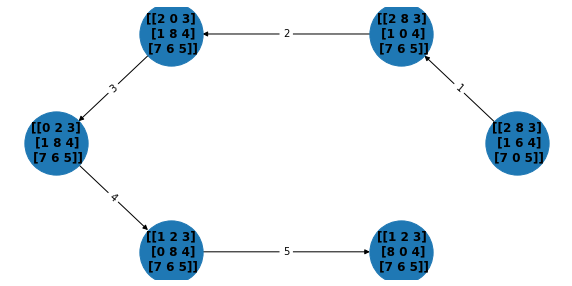

In [9]:
rutaNodos = crear_ruta_nodos(nodoResultado)
graficar_ruta_nodos(rutaNodos)

## 3. Pruebas Unitarias

In [10]:
import unittest
from numpy.testing import assert_array_equal
class TestNotebook(unittest.TestCase):
    def test_buscar_espacio_vacio(self):
        puz=PuzzleClass()
        arrayI = np.array([[1,0], [3,2]])
        i, j = puz.buscar_espacio_vacio(arrayI)
        self.assertEqual(i, 0)
        self.assertEqual(j, 1)
        arrayI = np.array([[1,2,3], [3,2,8],[2,3,0]])
        i, j = puz.buscar_espacio_vacio(arrayI)
        self.assertEqual(i, 2)
        self.assertEqual(j, 2)        
    def test_pos_adyacente(self):
        puz=PuzzleClass()
        arrayPos = puz.pos_adyacente(0,1)
        assert_array_equal(arrayPos,[['-1','1','arriba'],['1','1','abajo'],
                                     ['0','0','izquierda'],['0','2','derecha']])
        arrayPosN = puz.pos_adyacente(3,2)
        assert_array_equal(arrayPosN,[['2','2','arriba'],['4','2','abajo'],
                                     ['3','1','izquierda'],['3','3','derecha']])
    def test_crear_puzzle_hijos(self):
        puz=PuzzleClass()
        arrayI = np.array([[1,0], [3,2]])
        pos_ayacentes = np.array([['-1','1','arriba'],['1','1','abajo'],
                                  ['0','0','izquierda'],['0','2','derecha']])
        puzzle_hijos,acciones,fichas = puz.crear_puzzle_hijos(0,1,pos_ayacentes,arrayI)        
        assert_array_equal(puzzle_hijos,[[[1, 2],[3, 0]],
                                         [[0, 1],[3, 2]]])
        assert_array_equal(acciones,['arriba','derecha'])
        assert_array_equal(fichas,[2,1])
    def test_crear_nodos_hijos(self):
        puzzle = np.array([[1,4,3], [5,8,6],[7,0,2]])
        nodo = Nodo("A",puzzle)
        puz=PuzzleClass()
        nodos_hijos = puz.crear_nodos_hijos(nodo)
        self.assertEqual(len(nodos_hijos),3)
        puzzle = np.array([[1,4,3], [5,0,6],[7,8,2]])
        nodo = Nodo("B",puzzle)
        nodos_hijos = puz.crear_nodos_hijos(nodo)
        self.assertEqual(len(nodos_hijos),4)
    def test_no_matriz_cuadrada(self):  
        puzzle = np.array([[1,4,3], [5,8,6,4],[7,0]])
        with self.assertRaises(Exception): Nodo("A", puzzle)
    def test_son_nodos_iguales(self):                
        puzzle = np.array([[1,0], [3,2]])
        nodo = Nodo("A",puzzle)        
        puzzleM = np.array([[1,2], [3,0]])
        nodoM = Nodo("M",puzzleM)
        self.assertTrue(nodo == nodo)
        self.assertFalse(nodo == nodoM)
        nodoB = Nodo("B",puzzle)
        self.assertTrue(nodo == nodoB)
    def test_calcular_heuristica_A(self):
        nodoA = Nodo("A",np.array([[1,2],[0,3]]))          
        nodoM = Nodo("M",np.array([[1,2],[3,0]]))
        self.assertEqual(nodoA.calcular_heuristica(nodoM),1)
        nodoB = Nodo("B",np.array([[0,2],[1,3]]))  
        self.assertEqual(nodoB.calcular_heuristica(nodoM),2)
        nodoC = Nodo("C",np.array([[2,0],[1,3]]))  
        self.assertEqual(nodoC.calcular_heuristica(nodoM),3)
        nodoD = Nodo("D",np.array([[2,0,3],[8,1,4],[7,6,5]]))  
        nodoM = Nodo("M",np.array([[1,2,3],[8,0,4],[7,6,5]]))
        self.assertEqual(nodoD.calcular_heuristica(nodoM),2)      
    def test_calcular_heuristica_B(self):        
        nodoA = Nodo("A",np.array([[2,0,3],[8,1,4],[7,6,5]]))  
        nodoM = Nodo("M",np.array([[1,2,3],[8,0,4],[7,6,5]]))
        self.assertEqual(nodoA.calcular_heuristica(nodoM),2)      
        nodoB = Nodo("B",np.array([[1,2,3],[0,8,4],[7,6,5]]))          
        self.assertEqual(nodoB.calcular_heuristica(nodoM),1)      
        nodoC = Nodo("C",np.array([[1,2,3],[8,0,4],[7,6,5]]))          
        self.assertEqual(nodoC.calcular_heuristica(nodoM),0)      
        nodoD = Nodo("D",np.array([[2,3,1],[0,4,8],[6,5,7]]))          
        self.assertEqual(nodoD.calcular_heuristica(nodoM),8)
    def test_ordenar_lista_heuristica_A(self):
        nodoA = Nodo("A",np.array([[1,2], [0,3]]))  
        nodoB = Nodo("B",np.array([[3,2], [1,0]]))
        nodoC = Nodo("C",np.array([[2,1], [3,0]]))
        nodoD = Nodo("D",np.array([[0,1], [2,3]]))
        nodo = Nodo("Root",puzzle)        
        nodosHijosTemp = []
        nodosHijosTemp.append(nodoA)
        nodosHijosTemp.append(nodoB)
        nodosHijosTemp.append(nodoC)
        nodosHijosTemp.append(nodoD)
        nodo.nodoshijos = nodosHijosTemp
        puzzleM = np.array([[1,2], [3,0]])
        nodoM = Nodo("M",puzzleM)     
        costo_uniforme = 1
        nodo.ordenar_lista_heuristica(costo_uniforme,nodoM)        
        assert_array_equal(nodo.nodoshijos,[nodoD,nodoC,nodoB,nodoA])
    def test_ordenar_lista_heuristica_B(self):
        nodoA = Nodo("A",np.array([[1,4,5],[2,3,0],[6,7,8]]))  
        nodoB = Nodo("B",np.array([[1,2,4],[3,5,0],[6,7,8]]))
        nodoC = Nodo("C",np.array([[1,2,3],[4,0,5],[6,7,8]]))        
        nodo = Nodo("Root",puzzle)        
        nodosHijosTemp = []
        nodosHijosTemp.append(nodoA)
        nodosHijosTemp.append(nodoB)
        nodosHijosTemp.append(nodoC)        
        nodo.nodoshijos = nodosHijosTemp
        puzzleM = np.array([[1,2,3], [4,5,0],[6,7,8]])
        nodoM = Nodo("M",puzzleM)     
        costo_uniforme = 1
        nodo.ordenar_lista_heuristica(costo_uniforme,nodoM)        
        assert_array_equal(nodo.nodoshijos,[nodoA,nodoB,nodoC])
unittest.main(argv=[''], verbosity=4, exit=False)

test_buscar_espacio_vacio (__main__.TestNotebook) ... ok
test_calcular_heuristica_A (__main__.TestNotebook) ... ok
test_calcular_heuristica_B (__main__.TestNotebook) ... ok
test_crear_nodos_hijos (__main__.TestNotebook) ... ok
test_crear_puzzle_hijos (__main__.TestNotebook) ... ok
test_no_matriz_cuadrada (__main__.TestNotebook) ... ok
test_ordenar_lista_heuristica_A (__main__.TestNotebook) ... ok
test_ordenar_lista_heuristica_B (__main__.TestNotebook) ... ok
test_pos_adyacente (__main__.TestNotebook) ... ok
test_son_nodos_iguales (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 10 tests in 0.012s

OK


### Tabla de valoración individual

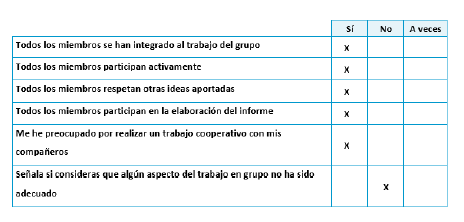